In [ ]:
import pandas as pd
import os
from tqdm import tqdm
from glob import glob 
import numpy as np
# from posecheck import PoseCheck
# pandas_df
import json
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

with open('../../sup_info/UniprotIDs_duplicated_with_crossdock2020.json','r') as f:
    UniprotId_in_crossdock = json.load(f)

In [ ]:

benchmark_dir = '/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score'
active_result = []
rounds_result_hit2lead = []
rounds_result_denovo = []
for uniprot_id in os.listdir(benchmark_dir):
    if os.path.isfile(os.path.join(benchmark_dir,uniprot_id)):
        continue
    ligand_dir_list = os.listdir(os.path.join(benchmark_dir,uniprot_id))
    for ligand_path_dir in ligand_dir_list:


        if ligand_path_dir == 'reference_active_molecules':

            ligand_path_list = [os.path.join(benchmark_dir,uniprot_id,ligand_path_dir,f'{uniprot_id}_reference_active_molecules_vina_docked_clash_score.csv')]
            for ligand_path in ligand_path_list:
                if os.path.exists(ligand_path):
                    ligand_df = pd.read_csv(ligand_path)
                    ligand_df['uniprot_id'] = uniprot_id
                    ligand_df['ligand_path_dir'] = ligand_path_dir
                    
                    active_result.append(ligand_df)
        else:
            ligand_path_list = glob(os.path.join(benchmark_dir,uniprot_id,ligand_path_dir,'*','*','*.csv'))
            for ligand_path in ligand_path_list:
                if os.path.exists(ligand_path):
                    ligand_df = pd.read_csv(ligand_path)
                    ligand_df['uniprot_id'] = uniprot_id
                    ligand_df['Round'] = ligand_path_dir
                    ligand_df['ligand_path_dir'] = ligand_path
                    rounds_result_denovo.append(ligand_df)
            ligand_path_list = glob(os.path.join(benchmark_dir,uniprot_id,ligand_path_dir,'*','*','*','*.csv'))
            for ligand_path in ligand_path_list:
                if os.path.exists(ligand_path):
                    ligand_df = pd.read_csv(ligand_path)
                    ligand_df['uniprot_id'] = uniprot_id
                    ligand_df['Round'] = ligand_path_dir
                    ligand_df['ligand_path_dir'] = ligand_path
                    rounds_result_hit2lead.append(ligand_df)

In [ ]:
active_result = pd.concat(active_result,ignore_index=True)
rounds_result_hit2lead = pd.concat(rounds_result_hit2lead,ignore_index=True)
rounds_result_denovo = pd.concat(rounds_result_denovo,ignore_index=True)

In [ ]:

rounds_result_denovo_vina = rounds_result_denovo[rounds_result_denovo['ligand_path_dir'].str.contains('vina')]
rounds_result_denovo_raw = rounds_result_denovo[~rounds_result_denovo['ligand_path_dir'].str.contains('vina')]



In [ ]:

rounds_result_hit2lead_vina = rounds_result_hit2lead[rounds_result_hit2lead['ligand_path_dir'].str.contains('vina')]
rounds_result_hit2lead_raw = rounds_result_hit2lead[~rounds_result_hit2lead['ligand_path_dir'].str.contains('vina')]



In [ ]:

rounds_result_denovo_vina['model_name'] = rounds_result_denovo_vina['ligand_name'].apply(lambda x: '_'.join(x.split('_idx')[0].split('_')[1:]))
rounds_result_denovo_raw['model_name'] = rounds_result_denovo_raw['ligand_name'].apply(lambda x: '_'.join(x.split('_idx')[0].split('_')[1:]))


In [ ]:

rounds_result_hit2lead_vina['model_name'] = rounds_result_hit2lead_vina['ligand_name'].apply(lambda x: '_'.join(x.split('_idx')[0].split('_')[2:]))
rounds_result_hit2lead_raw['model_name'] = rounds_result_hit2lead_raw['ligand_name'].apply(lambda x: '_'.join(x.split('_idx')[0].split('_')[2:]))

In [ ]:
rounds_result_denovo_vina_round1 = rounds_result_denovo_vina[rounds_result_denovo_vina['Round'].str.contains('Round1')]
rounds_result_denovo_vina_round2 = rounds_result_denovo_vina[rounds_result_denovo_vina['Round'].str.contains('Round2')]
rounds_result_denovo_vina_round3 = rounds_result_denovo_vina[rounds_result_denovo_vina['Round'].str.contains('Round3')]
## 根据模型分组后在每个uniprot id 下求平均，再再模型下求平均
rounds_result_denovo_vina_round1 = rounds_result_denovo_vina_round1.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_vina_round1 = rounds_result_denovo_vina_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_vina_round1['Round'] = ['Round1']*len(rounds_result_denovo_vina_round1)
## vina round2
rounds_result_denovo_vina_round2 = rounds_result_denovo_vina_round2.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_vina_round2 = rounds_result_denovo_vina_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_vina_round2['Round'] = ['Round2']*len(rounds_result_denovo_vina_round2)
## vina round3
rounds_result_denovo_vina_round3 = rounds_result_denovo_vina_round3.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_vina_round3 = rounds_result_denovo_vina_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_vina_round3['Round'] = ['Round3']*len(rounds_result_denovo_vina_round3)
vina_repeats = pd.concat([rounds_result_denovo_vina_round1,rounds_result_denovo_vina_round2,rounds_result_denovo_vina_round3],ignore_index=True)

In [ ]:

vina_repeats.groupby('model_name')['clash_score'].agg(['mean','std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/vina_repests_denovo_all.csv')

In [ ]:
# hit2lead vina
rounds_result_hit2lead_vina_round1 = rounds_result_hit2lead_vina[rounds_result_hit2lead_vina['Round'].str.contains('Round1')]
rounds_result_hit2lead_vina_round2 = rounds_result_hit2lead_vina[rounds_result_hit2lead_vina['Round'].str.contains('Round2')]
rounds_result_hit2lead_vina_round3 = rounds_result_hit2lead_vina[rounds_result_hit2lead_vina['Round'].str.contains('Round3')]
## 根据模型分组后在每个uniprot id 下求平均，再再模型下求平均
rounds_result_hit2lead_vina_round1 = rounds_result_hit2lead_vina_round1.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_round1 = rounds_result_hit2lead_vina_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_round1['Round'] = ['Round1']*len(rounds_result_hit2lead_vina_round1)
## vina round2
rounds_result_hit2lead_vina_round2 = rounds_result_hit2lead_vina_round2.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_round2 = rounds_result_hit2lead_vina_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_round2['Round'] = ['Round2']*len(rounds_result_hit2lead_vina_round2)
## vina round3
rounds_result_hit2lead_vina_round3 = rounds_result_hit2lead_vina_round3.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_round3 = rounds_result_hit2lead_vina_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_round3['Round'] = ['Round3']*len(rounds_result_hit2lead_vina_round3)
vina_hit2lead_repeats = pd.concat([rounds_result_hit2lead_vina_round1,rounds_result_hit2lead_vina_round2,rounds_result_hit2lead_vina_round3],ignore_index=True)

In [ ]:
vina_hit2lead_repeats.groupby('model_name')['clash_score'].agg(['mean','std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/vina_repests_hit2lead_all.csv')

In [ ]:
## vina denovo seen pose
rounds_result_denovo_vina_seen = rounds_result_denovo_vina[rounds_result_denovo_vina['uniprot_id'].isin(UniprotId_in_crossdock)]
# len(rounds_result_denovo_vina_seen['uniprot_id'].unique())
print('seen uniprot id:', len(rounds_result_denovo_vina_seen['uniprot_id'].unique()))
rounds_result_denovo_vina_seen_round1 = rounds_result_denovo_vina_seen[rounds_result_denovo_vina_seen['Round'].str.contains('Round1')]
rounds_result_denovo_vina_seen_round2 = rounds_result_denovo_vina_seen[rounds_result_denovo_vina_seen['Round'].str.contains('Round2')]
rounds_result_denovo_vina_seen_round3 = rounds_result_denovo_vina_seen[rounds_result_denovo_vina_seen['Round'].str.contains('Round3')]

## Group by model and uniprot_id, then compute mean clash_score, followed by grouping by model_name
rounds_result_denovo_vina_seen_round1 = rounds_result_denovo_vina_seen_round1.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_vina_seen_round1 = rounds_result_denovo_vina_seen_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_vina_seen_round1['Round'] = ['Round1']*len(rounds_result_denovo_vina_seen_round1)

## vina round2
rounds_result_denovo_vina_seen_round2 = rounds_result_denovo_vina_seen_round2.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_vina_seen_round2 = rounds_result_denovo_vina_seen_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_vina_seen_round2['Round'] = ['Round2']*len(rounds_result_denovo_vina_seen_round2)

## vina round3
rounds_result_denovo_vina_seen_round3 = rounds_result_denovo_vina_seen_round3.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_vina_seen_round3 = rounds_result_denovo_vina_seen_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_vina_seen_round3['Round'] = ['Round3']*len(rounds_result_denovo_vina_seen_round3)

denovo_vina_seen_repeats = pd.concat([rounds_result_denovo_vina_seen_round1, rounds_result_denovo_vina_seen_round2, rounds_result_denovo_vina_seen_round3], ignore_index=True)
denovo_vina_seen_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/vina_repests_denovo_seen.csv')

## vina denovo unseen pose
rounds_result_denovo_vina_unseen = rounds_result_denovo_vina[~rounds_result_denovo_vina['uniprot_id'].isin(UniprotId_in_crossdock)]
# len(rounds_result_denovo_vina_unseen['uniprot_id'].unique())
print('unseen uniprot id:', len(rounds_result_denovo_vina_unseen['uniprot_id'].unique()))
rounds_result_denovo_vina_unseen_round1 = rounds_result_denovo_vina_unseen[rounds_result_denovo_vina_unseen['Round'].str.contains('Round1')]
rounds_result_denovo_vina_unseen_round2 = rounds_result_denovo_vina_unseen[rounds_result_denovo_vina_unseen['Round'].str.contains('Round2')]
rounds_result_denovo_vina_unseen_round3 = rounds_result_denovo_vina_unseen[rounds_result_denovo_vina_unseen['Round'].str.contains('Round3')]

## Group by model and uniprot_id, then compute mean clash_score, followed by grouping by model_name
rounds_result_denovo_vina_unseen_round1 = rounds_result_denovo_vina_unseen_round1.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_vina_unseen_round1 = rounds_result_denovo_vina_unseen_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_vina_unseen_round1['Round'] = ['Round1']*len(rounds_result_denovo_vina_unseen_round1)

## vina round2
rounds_result_denovo_vina_unseen_round2 = rounds_result_denovo_vina_unseen_round2.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_vina_unseen_round2 = rounds_result_denovo_vina_unseen_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_vina_unseen_round2['Round'] = ['Round2']*len(rounds_result_denovo_vina_unseen_round2)

## vina round3
rounds_result_denovo_vina_unseen_round3 = rounds_result_denovo_vina_unseen_round3.groupby(['uniprot_id','model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_vina_unseen_round3 = rounds_result_denovo_vina_unseen_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_vina_unseen_round3['Round'] = ['Round3']*len(rounds_result_denovo_vina_unseen_round3)

denovo_vina_unseen_repeats = pd.concat([rounds_result_denovo_vina_unseen_round1, rounds_result_denovo_vina_unseen_round2, rounds_result_denovo_vina_unseen_round3], ignore_index=True)
denovo_vina_unseen_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/vina_repests_denovo_unseen.csv')

In [ ]:
## vina hit2lead seen pose
rounds_result_hit2lead_vina_seen = rounds_result_hit2lead_vina[rounds_result_hit2lead_vina['uniprot_id'].isin(UniprotId_in_crossdock)]
print('seen uniprot id:', len(rounds_result_hit2lead_vina_seen['uniprot_id'].unique()))

# Split data into rounds
rounds_result_hit2lead_vina_seen_round1 = rounds_result_hit2lead_vina_seen[rounds_result_hit2lead_vina_seen['Round'].str.contains('Round1')]
rounds_result_hit2lead_vina_seen_round2 = rounds_result_hit2lead_vina_seen[rounds_result_hit2lead_vina_seen['Round'].str.contains('Round2')]
rounds_result_hit2lead_vina_seen_round3 = rounds_result_hit2lead_vina_seen[rounds_result_hit2lead_vina_seen['Round'].str.contains('Round3')]

# Group by model and uniprot_id, then compute mean clash_score, followed by grouping by model_name
rounds_result_hit2lead_vina_seen_round1 = rounds_result_hit2lead_vina_seen_round1.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_seen_round1 = rounds_result_hit2lead_vina_seen_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_seen_round1['Round'] = ['Round1'] * len(rounds_result_hit2lead_vina_seen_round1)

# Vina round2
rounds_result_hit2lead_vina_seen_round2 = rounds_result_hit2lead_vina_seen_round2.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_seen_round2 = rounds_result_hit2lead_vina_seen_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_seen_round2['Round'] = ['Round2'] * len(rounds_result_hit2lead_vina_seen_round2)

# Vina round3
rounds_result_hit2lead_vina_seen_round3 = rounds_result_hit2lead_vina_seen_round3.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_seen_round3 = rounds_result_hit2lead_vina_seen_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_seen_round3['Round'] = ['Round3'] * len(rounds_result_hit2lead_vina_seen_round3)

# Combine results for all rounds
hit2lead_vina_seen_repeats = pd.concat([rounds_result_hit2lead_vina_seen_round1, rounds_result_hit2lead_vina_seen_round2, rounds_result_hit2lead_vina_seen_round3], ignore_index=True)
hit2lead_vina_seen_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/vina_repests_hit2lead_seen.csv')

## vina hit2lead unseen pose
rounds_result_hit2lead_vina_unseen = rounds_result_hit2lead_vina[~rounds_result_hit2lead_vina['uniprot_id'].isin(UniprotId_in_crossdock)]
print('unseen uniprot id:', len(rounds_result_hit2lead_vina_unseen['uniprot_id'].unique()))

# Split data into rounds
rounds_result_hit2lead_vina_unseen_round1 = rounds_result_hit2lead_vina_unseen[rounds_result_hit2lead_vina_unseen['Round'].str.contains('Round1')]
rounds_result_hit2lead_vina_unseen_round2 = rounds_result_hit2lead_vina_unseen[rounds_result_hit2lead_vina_unseen['Round'].str.contains('Round2')]
rounds_result_hit2lead_vina_unseen_round3 = rounds_result_hit2lead_vina_unseen[rounds_result_hit2lead_vina_unseen['Round'].str.contains('Round3')]

# Group by model and uniprot_id, then compute mean clash_score, followed by grouping by model_name
rounds_result_hit2lead_vina_unseen_round1 = rounds_result_hit2lead_vina_unseen_round1.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_unseen_round1 = rounds_result_hit2lead_vina_unseen_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_unseen_round1['Round'] = ['Round1'] * len(rounds_result_hit2lead_vina_unseen_round1)

# Vina round2
rounds_result_hit2lead_vina_unseen_round2 = rounds_result_hit2lead_vina_unseen_round2.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_unseen_round2 = rounds_result_hit2lead_vina_unseen_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_unseen_round2['Round'] = ['Round2'] * len(rounds_result_hit2lead_vina_unseen_round2)

# Vina round3
rounds_result_hit2lead_vina_unseen_round3 = rounds_result_hit2lead_vina_unseen_round3.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_unseen_round3 = rounds_result_hit2lead_vina_unseen_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_vina_unseen_round3['Round'] = ['Round3'] * len(rounds_result_hit2lead_vina_unseen_round3)
# Combine results for all rounds
hit2lead_vina_unseen_repeats = pd.concat([rounds_result_hit2lead_vina_unseen_round1, rounds_result_hit2lead_vina_unseen_round2, rounds_result_hit2lead_vina_unseen_round3], ignore_index=True)
hit2lead_vina_unseen_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/vina_repests_hit2lead_unseen.csv')

# raw pose

In [ ]:
## raw pose result
rounds_result_denovo_raw_round1 = rounds_result_denovo_raw[rounds_result_denovo_raw['Round'].str.contains('Round1')]
rounds_result_denovo_raw_round2 = rounds_result_denovo_raw[rounds_result_denovo_raw['Round'].str.contains('Round2')]
rounds_result_denovo_raw_round3 = rounds_result_denovo_raw[rounds_result_denovo_raw['Round'].str.contains('Round3')]

# Group by model and uniprot_id, then compute mean clash_score, followed by grouping by model_name
rounds_result_denovo_raw_round1 = rounds_result_denovo_raw_round1.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_raw_round1 = rounds_result_denovo_raw_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_raw_round1['Round'] = ['Round1'] * len(rounds_result_denovo_raw_round1)

rounds_result_denovo_raw_round2 = rounds_result_denovo_raw_round2.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_raw_round2 = rounds_result_denovo_raw_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_raw_round2['Round'] = ['Round2'] * len(rounds_result_denovo_raw_round2)

rounds_result_denovo_raw_round3 = rounds_result_denovo_raw_round3.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_raw_round3 = rounds_result_denovo_raw_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_raw_round3['Round'] = ['Round3'] * len(rounds_result_denovo_raw_round3)

# Combine results for all rounds
raw_repeats = pd.concat([rounds_result_denovo_raw_round1, rounds_result_denovo_raw_round2, rounds_result_denovo_raw_round3], ignore_index=True)

In [ ]:
# raw_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index()
## 把model_name 为TamGen的值都设置为零
raw_repeats.loc[raw_repeats['model_name'] == 'TamGen', 'clash_score'] = 0
raw_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/raw_repests_denovo_all.csv')

In [ ]:
# hit2lead raw pose
rounds_result_hit2lead_raw_round1 = rounds_result_hit2lead_raw[rounds_result_hit2lead_raw['Round'].str.contains('Round1')]
rounds_result_hit2lead_raw_round2 = rounds_result_hit2lead_raw[rounds_result_hit2lead_raw['Round'].str.contains('Round2')]
rounds_result_hit2lead_raw_round3 = rounds_result_hit2lead_raw[rounds_result_hit2lead_raw['Round'].str.contains('Round3')]
# Group by model and uniprot_id, then compute mean clash_score, followed by grouping by model_name
rounds_result_hit2lead_raw_round1 = rounds_result_hit2lead_raw_round1.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_round1 = rounds_result_hit2lead_raw_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_round1['Round'] = ['Round1'] * len(rounds_result_hit2lead_raw_round1)
rounds_result_hit2lead_raw_round2 = rounds_result_hit2lead_raw_round2.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_round2 = rounds_result_hit2lead_raw_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_round2['Round'] = ['Round2'] * len(rounds_result_hit2lead_raw_round2)
rounds_result_hit2lead_raw_round3 = rounds_result_hit2lead_raw_round3.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_round3 = rounds_result_hit2lead_raw_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_round3['Round'] = ['Round3'] * len(rounds_result_hit2lead_raw_round3)
# Combine results for all rounds
raw_hit2lead_repeats = pd.concat([rounds_result_hit2lead_raw_round1, rounds_result_hit2lead_raw_round2, rounds_result_hit2lead_raw_round3], ignore_index=True)
# raw_hit2lead_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index()
raw_hit2lead_repeats.loc[raw_hit2lead_repeats['model_name'] == 'PGMG', 'clash_score'] = 0
raw_hit2lead_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/raw_repests_hit2lead_all.csv')

In [ ]:
## raw pose denovo seen and unseen

# Split raw pose data for denovo
rounds_result_denovo_raw_seen = rounds_result_denovo_raw[rounds_result_denovo_raw['uniprot_id'].isin(UniprotId_in_crossdock)]
rounds_result_denovo_raw_unseen = rounds_result_denovo_raw[~rounds_result_denovo_raw['uniprot_id'].isin(UniprotId_in_crossdock)]

print('seen uniprot id:', len(rounds_result_denovo_raw_seen['uniprot_id'].unique()))
print('unseen uniprot id:', len(rounds_result_denovo_raw_unseen['uniprot_id'].unique()))

# Process seen data by rounds
rounds_result_denovo_raw_seen_round1 = rounds_result_denovo_raw_seen[rounds_result_denovo_raw_seen['Round'].str.contains('Round1')]
rounds_result_denovo_raw_seen_round2 = rounds_result_denovo_raw_seen[rounds_result_denovo_raw_seen['Round'].str.contains('Round2')]
rounds_result_denovo_raw_seen_round3 = rounds_result_denovo_raw_seen[rounds_result_denovo_raw_seen['Round'].str.contains('Round3')]

# Group by uniprot_id and model_name, then by model_name
rounds_result_denovo_raw_seen_round1 = rounds_result_denovo_raw_seen_round1.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_raw_seen_round1 = rounds_result_denovo_raw_seen_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_raw_seen_round1['Round'] = ['Round1'] * len(rounds_result_denovo_raw_seen_round1)

rounds_result_denovo_raw_seen_round2 = rounds_result_denovo_raw_seen_round2.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_raw_seen_round2 = rounds_result_denovo_raw_seen_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_raw_seen_round2['Round'] = ['Round2'] * len(rounds_result_denovo_raw_seen_round2)

rounds_result_denovo_raw_seen_round3 = rounds_result_denovo_raw_seen_round3.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_raw_seen_round3 = rounds_result_denovo_raw_seen_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_raw_seen_round3['Round'] = ['Round3'] * len(rounds_result_denovo_raw_seen_round3)

# Combine results for all rounds
raw_denovo_seen_repeats = pd.concat([rounds_result_denovo_raw_seen_round1, rounds_result_denovo_raw_seen_round2, rounds_result_denovo_raw_seen_round3], ignore_index=True)
raw_denovo_seen_repeats.loc[raw_denovo_seen_repeats['model_name'] == 'TamGen', 'clash_score'] = 0
raw_denovo_seen_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/raw_repests_denovo_seen.csv')

# Process unseen data by rounds
rounds_result_denovo_raw_unseen_round1 = rounds_result_denovo_raw_unseen[rounds_result_denovo_raw_unseen['Round'].str.contains('Round1')]
rounds_result_denovo_raw_unseen_round2 = rounds_result_denovo_raw_unseen[rounds_result_denovo_raw_unseen['Round'].str.contains('Round2')]
rounds_result_denovo_raw_unseen_round3 = rounds_result_denovo_raw_unseen[rounds_result_denovo_raw_unseen['Round'].str.contains('Round3')]

# Group by uniprot_id and model_name, then by model_name
rounds_result_denovo_raw_unseen_round1 = rounds_result_denovo_raw_unseen_round1.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_raw_unseen_round1 = rounds_result_denovo_raw_unseen_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_raw_unseen_round1['Round'] = ['Round1'] * len(rounds_result_denovo_raw_unseen_round1)

rounds_result_denovo_raw_unseen_round2 = rounds_result_denovo_raw_unseen_round2.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_raw_unseen_round2 = rounds_result_denovo_raw_unseen_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_raw_unseen_round2['Round'] = ['Round2'] * len(rounds_result_denovo_raw_unseen_round2)

rounds_result_denovo_raw_unseen_round3 = rounds_result_denovo_raw_unseen_round3.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_denovo_raw_unseen_round3 = rounds_result_denovo_raw_unseen_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_denovo_raw_unseen_round3['Round'] = ['Round3'] * len(rounds_result_denovo_raw_unseen_round3)

# Combine results for all rounds
raw_denovo_unseen_repeats = pd.concat([rounds_result_denovo_raw_unseen_round1, rounds_result_denovo_raw_unseen_round2, rounds_result_denovo_raw_unseen_round3], ignore_index=True)
raw_denovo_unseen_repeats.loc[raw_denovo_unseen_repeats['model_name'] == 'TamGen', 'clash_score'] = 0
raw_denovo_unseen_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/raw_repests_denovo_unseen.csv')

## raw hit2lead seen and unseen

# Split raw pose data for hit2lead
rounds_result_hit2lead_raw_seen = rounds_result_hit2lead_raw[rounds_result_hit2lead_raw['uniprot_id'].isin(UniprotId_in_crossdock)]
rounds_result_hit2lead_raw_unseen = rounds_result_hit2lead_raw[~rounds_result_hit2lead_raw['uniprot_id'].isin(UniprotId_in_crossdock)]

print('seen uniprot id:', len(rounds_result_hit2lead_raw_seen['uniprot_id'].unique()))
print('unseen uniprot id:', len(rounds_result_hit2lead_raw_unseen['uniprot_id'].unique()))

# Process seen data by rounds
rounds_result_hit2lead_raw_seen_round1 = rounds_result_hit2lead_raw_seen[rounds_result_hit2lead_raw_seen['Round'].str.contains('Round1')]
rounds_result_hit2lead_raw_seen_round2 = rounds_result_hit2lead_raw_seen[rounds_result_hit2lead_raw_seen['Round'].str.contains('Round2')]
rounds_result_hit2lead_raw_seen_round3 = rounds_result_hit2lead_raw_seen[rounds_result_hit2lead_raw_seen['Round'].str.contains('Round3')]

# Group by uniprot_id and model_name, then by model_name
rounds_result_hit2lead_raw_seen_round1 = rounds_result_hit2lead_raw_seen_round1.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_seen_round1 = rounds_result_hit2lead_raw_seen_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_seen_round1['Round'] = ['Round1'] * len(rounds_result_hit2lead_raw_seen_round1)

rounds_result_hit2lead_raw_seen_round2 = rounds_result_hit2lead_raw_seen_round2.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_seen_round2 = rounds_result_hit2lead_raw_seen_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_seen_round2['Round'] = ['Round2'] * len(rounds_result_hit2lead_raw_seen_round2)

rounds_result_hit2lead_raw_seen_round3 = rounds_result_hit2lead_raw_seen_round3.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_seen_round3 = rounds_result_hit2lead_raw_seen_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_seen_round3['Round'] = ['Round3'] * len(rounds_result_hit2lead_raw_seen_round3)

# Combine results for all rounds
raw_hit2lead_seen_repeats = pd.concat([rounds_result_hit2lead_raw_seen_round1, rounds_result_hit2lead_raw_seen_round2, rounds_result_hit2lead_raw_seen_round3], ignore_index=True)
raw_hit2lead_seen_repeats.loc[raw_hit2lead_seen_repeats['model_name'] == 'PGMG', 'clash_score'] = 0
raw_hit2lead_seen_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/raw_repests_hit2lead_seen.csv')

# Process unseen data by rounds
rounds_result_hit2lead_raw_unseen_round1 = rounds_result_hit2lead_raw_unseen[rounds_result_hit2lead_raw_unseen['Round'].str.contains('Round1')]
rounds_result_hit2lead_raw_unseen_round2 = rounds_result_hit2lead_raw_unseen[rounds_result_hit2lead_raw_unseen['Round'].str.contains('Round2')]
rounds_result_hit2lead_raw_unseen_round3 = rounds_result_hit2lead_raw_unseen[rounds_result_hit2lead_raw_unseen['Round'].str.contains('Round3')]

# Group by uniprot_id and model_name, then by model_name
rounds_result_hit2lead_raw_unseen_round1 = rounds_result_hit2lead_raw_unseen_round1.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_unseen_round1 = rounds_result_hit2lead_raw_unseen_round1.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_unseen_round1['Round'] = ['Round1'] * len(rounds_result_hit2lead_raw_unseen_round1)

rounds_result_hit2lead_raw_unseen_round2 = rounds_result_hit2lead_raw_unseen_round2.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_unseen_round2 = rounds_result_hit2lead_raw_unseen_round2.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_unseen_round2['Round'] = ['Round2'] * len(rounds_result_hit2lead_raw_unseen_round2)

rounds_result_hit2lead_raw_unseen_round3 = rounds_result_hit2lead_raw_unseen_round3.groupby(['uniprot_id', 'model_name'])['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_unseen_round3 = rounds_result_hit2lead_raw_unseen_round3.groupby('model_name')['clash_score'].mean().reset_index()
rounds_result_hit2lead_raw_unseen_round3['Round'] = ['Round3'] * len(rounds_result_hit2lead_raw_unseen_round3)

# Combine results for all roundsS
raw_hit2lead_unseen_repeats = pd.concat([rounds_result_hit2lead_raw_unseen_round1, rounds_result_hit2lead_raw_unseen_round2, rounds_result_hit2lead_raw_unseen_round3], ignore_index=True)
raw_hit2lead_unseen_repeats.loc[raw_hit2lead_unseen_repeats['model_name'] == 'PGMG', 'clash_score'] = 0
raw_hit2lead_unseen_repeats.groupby('model_name')['clash_score'].agg(['mean', 'std']).reset_index().to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/raw_repests_hit2lead_unseen.csv')

In [ ]:
## 定义一个函数读取所有文件夹下的csv 文件，然后添加给每个文件增加一个filename列
def read_csv_files_in_directory(directory):
    # 获取所有csv文件的路径
    csv_files = glob(os.path.join(directory, '*.csv'))
    print(f'Num of files {len(csv_files)}')
    all_dataframes = []
    
    # 遍历每个csv文件
    for file in tqdm(csv_files, desc="Processing files"):
        # 读取csv文件
        df = pd.read_csv(file)
        
        # 提取文件名（不带扩展名）
        filename = os.path.splitext(os.path.basename(file))[0]
        
        # 添加filename列
        df['filename'] = filename
        
        # 将数据框添加到列表中
        all_dataframes.append(df)
    
    # 合并所有数据框
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    
    return combined_df

In [ ]:
data_dir = '/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score'
combined_df = read_csv_files_in_directory(data_dir)

In [ ]:
combined_df['pose_source'] = combined_df['filename'].apply(lambda x: x.split('_')[0])
combined_df['model_type'] = combined_df['filename'].apply(lambda x: x.split('_')[-2])
combined_df['uniprot_type'] = combined_df['filename'].apply(lambda x: x.split('_')[-1])

In [ ]:
### select thhe pose source
combined_df = combined_df[combined_df['pose_source'].isin(['vina','raw'])]

In [ ]:
combined_df

In [ ]:

mask = (combined_df['model_name'] == 'ShapeMol') & (combined_df['pose_source'] == 'vina')
combined_df[['mean', 'std']] = combined_df[['mean', 'std']].mask(mask, 0)
combined_df.loc[mask, ['mean', 'std','model_name','pose_source']]

In [ ]:
combined_df.to_csv('/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/clash_score_denovo_hit2lead_all_protein.csv', index=False)

In [ ]:
combined_df[(combined_df['model_name']=='ShapeMol')].pose_source.unique()

In [ ]:
combined_df_denovo_seen = combined_df[(combined_df['model_type'] == 'denovo') & (combined_df['uniprot_type'] == 'seen')]
# combined_df_denovo_seen = combined_df[(combined_df['model_type'] == 'denovo')]

In [ ]:
# model_type=['denovo','hit2lead'], uniprot_type=['seen','unseen','all'],plot_typle=['with_mean_value','without_mean_value']
def replace_model_name(model_name):
    if 'diffSBDD_cond_crossdocked' in model_name:
        return 'DiffSBDD-C'
    elif 'diffSBDD_cond_moad' in model_name:
        return 'DiffSBDD-M'
    elif 'shepherd' in model_name:
        return 'ShEPhERD'
    elif 'DeleteHit2Lead' in model_name:
        return 'Delete'
    else:
        return model_name
def plot_clash_score_boxh(df, model_type='hit2lead', uniprot_type='all',plot_typle='without_mean_value'):
    # 定义顺序和图案
    combined_df_temp = df[(df['model_type']==model_type) & (df['uniprot_type']==uniprot_type)]
    title_str = f"Model Type: {model_type}; Uniprot Type: {uniprot_type}"
    
    pose_source_order = ['raw', 'vina']#, 'glide']
    hatches = ['', '//']#, 'xx']  # raw无图案, vina斜线, glide交叉线

    # 1. 按raw值排序模型
    raw_means = combined_df_temp[
        combined_df_temp['pose_source'] == 'raw'
    ].set_index('model_name')['mean'].sort_values(ascending=False)
    sorted_model_names = raw_means.index.tolist()

    # 2. 定义颜色映射
    model_names = list(combined_df_temp['model_name'].unique())
    model_names = sorted(model_names)
    color_list = sns.color_palette("deep", len(model_names))
    color_map = {name: color_list[i] for i, name in enumerate(model_names)}

    # 3. 创建图形
    plt.figure(figsize=(8, 12))
    ax = sns.barplot(y='model_name', x='mean',
                    data=combined_df_temp[combined_df_temp['pose_source'] == 'raw'],
                    order=sorted_model_names,
                    palette=color_map,
                    edgecolor='white',
                    linewidth=1,
                    alpha=0
    )

    # 计算每个模型的位置和宽度
    n_models = len(sorted_model_names)
    bar_width = 0.8 / len(pose_source_order)  # 计算每个pose源的宽度

    for model_idx, model in enumerate(sorted_model_names):
        model_y = model_idx  # 模型在y轴的位置
        base_color = color_map[model]
        
        for pose_idx, pose in enumerate(pose_source_order):
            # 计算当前pose源的位置
            pose_y = model_y - 0.4 + (pose_idx + 0.5) * bar_width
            
            # 获取当前数据
            data = combined_df_temp[
                (combined_df_temp['model_name'] == model) & 
                (combined_df_temp['pose_source'] == pose)
            ]
            
            if not data.empty:
                mean_val = data['mean'].values[0]
                std_val = data['std'].values[0]
                
                # 绘制条形
                bar = ax.barh(
                    pose_y, mean_val,
                    height=bar_width*0.9,  # 稍微小于计算宽度
                    color=base_color,
                    # edgecolor='black',
                    linewidth=1,
                    alpha=0.6,
                    hatch=hatches[pose_idx]
                )
                
                # 添加误差条
                if not np.isnan(std_val):
                    # ax.errorbar(
                    #     mean_val, pose_y,
                    #     xerr=std_val,
                    #     fmt='none', color='blue', capsize=1,alpha = 0.5
                       
                    # )
                    # 横线：从均值到均值+std
                    ax.plot(
                        [mean_val, mean_val + std_val],  # x 范围
                        [pose_y, pose_y],                # y 位置不变
                        color='black',
                        linewidth=2
                    )
                    # 竖线（误差棒末端）
                    ax.plot(
                        [mean_val + std_val, mean_val + std_val],
                        [pose_y - 0.08 * bar_width, pose_y + 0.08 * bar_width],  # 小竖线
                        color='black',
                        linewidth=2
                    )
                
                # 添加数值标签 - 关键新增部分
                if plot_typle == 'with_mean_value':
                    # ax.text(mean_val + 0.5,  # x位置：均值右侧一点
                    #         pose_y,           # y位置：条形中心
                    #         f'{mean_val:.3f}', # 显示两位小数
                    #         va='center',      # 垂直居中
                    #         ha='left',        # 水平左对齐
                    #         fontsize=14,
                    #         fontweight='bold')
                    ax.text(
                        mean_val + std_val + 0.5,  # 文字在误差棒右侧
                        # mean_val + std_val + 0.05,  # 文字在误差棒右侧
                        pose_y,
                        # f"{mean_val:.3f}±{std_val:.3f}",
                        f"{mean_val:.3f}",
                        va='center',
                        ha='left',
                        fontsize=14,
                        fontweight='bold'
                    )

    # 5. 设置y轴刻度
    ax.set_yticks(range(n_models))
    ax.set_yticklabels([replace_model_name(x) for x in sorted_model_names])

    # 6. 创建自定义图例
    from matplotlib.patches import Patch

    # 颜色图例（模型）
    color_legend = [Patch(facecolor=color_map[name], edgecolor='black', label=name) 
                for name in sorted_model_names]

    #
    hatch_legend = [
        Patch(facecolor='white', edgecolor='black', hatch=hatches[i], label=pose_name)
        for i, pose_name in enumerate(pose_source_order)
    ]
    if plot_typle == 'with_mean_value':
        # 设置图例字体
        legend = plt.legend(
            handles=hatch_legend,
            title='Pose Source',
            loc='lower right',
            fontsize=14,          # 图例条目字体
            title_fontsize=14,    # 标题字体
            frameon=True
        )
        # 可选：加粗
        legend.get_title().set_fontweight('bold')
        for txt in legend.get_texts():
            txt.set_fontweight('bold')

    # 7. 标签和样式
    plt.ylabel('')
    plt.xlabel('Clash Score', fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')

    # 设置x轴范围，为数值标签留出空间
    xlim = ax.get_xlim()
    ax.set_xlim(xlim[0], xlim[1] * 1.1)  # 增加10%空间

    plt.tight_layout()
    plt.title(title_str, fontsize=14, fontweight='bold')
    plt.savefig(f'/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/10-clash_score_boxh_{model_type}_{uniprot_type}_{plot_typle}_fzh.svg',bbox_inches='tight',dpi=660,format='svg')

    # plt.show()


In [ ]:
def plot_clash_score_boxh_all(df, model_type='hit2lead', plot_typle='without_mean_value'):
    from matplotlib.patches import Patch

    pose_source_order = ['raw', 'vina']
    uniprot_type_order = ['seen', 'unseen']
    pose_colors = {'raw': '#1f77b4', 'vina': '#ff7f0e'}  # raw: blue, vina: orange
    ut_hatch = {'seen': '', 'unseen': '/'}

    # 只选定指定 model_type
    combined_df_temp = df[df['model_type'] == model_type]
    model_names = sorted(combined_df_temp['model_name'].unique())

    def get_raw_mean(model, ut):
        d = combined_df_temp[(combined_df_temp['model_name'] == model) & 
                             (combined_df_temp['pose_source'] == 'raw') &
                             (combined_df_temp['uniprot_type'] == ut)]
        return d['mean'].values[0] if not d.empty else np.nan

    uniprot_types = combined_df_temp['uniprot_type'].unique()
    sort_ref_ut = 'all' if 'all' in uniprot_types else ('unseen' if 'unseen' in uniprot_types else 'seen')
    raw_means = {model: get_raw_mean(model, sort_ref_ut) for model in model_names}
    sorted_model_names = sorted(model_names, key=lambda x: raw_means[x] if not np.isnan(raw_means[x]) else -np.inf, reverse=True)

    plt.figure(figsize=(14, 10))
    ax = plt.gca()
    n_models = len(sorted_model_names)
    n_pose = len(pose_source_order)
    n_ut = len(uniprot_type_order)
    group_width = 0.8
    bar_width = group_width / (n_pose * n_ut)

    for model_idx, model in enumerate(sorted_model_names):
        for pose_idx, pose in enumerate(pose_source_order):
            for ut_idx, ut in enumerate(uniprot_type_order):
                group_start = model_idx - group_width/2
                bar_y = group_start + pose_idx * n_ut * bar_width + ut_idx * bar_width + bar_width/2
                data = combined_df_temp[
                    (combined_df_temp['model_name'] == model) &
                    (combined_df_temp['pose_source'] == pose) &
                    (combined_df_temp['uniprot_type'] == ut)
                ]
                if not data.empty:
                    mean_val = data['mean'].values[0]
                    std_val = data['std'].values[0]
                    ax.barh(
                        bar_y, mean_val,
                        height=bar_width*0.9,
                        color=pose_colors[pose],
                        edgecolor='black',
                        linewidth=1,
                        alpha=0.7,
                        hatch=ut_hatch[ut]
                    )
                    if not np.isnan(std_val):
                        ax.errorbar(
                            mean_val, bar_y,
                            xerr=std_val,
                            fmt='none', color='blue', capsize=2, alpha=0.5
                        )
                    if plot_typle == 'with_mean_value':
                        ax.text(mean_val + 0.5, bar_y, f'{mean_val:.2f}',
                                va='center', ha='left', fontsize=12, fontweight='bold')

    yticks = [model_idx for model_idx in range(n_models)]
    yticklabels = [replace_model_name(x) for x in sorted_model_names]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)

    color_legend = [
        Patch(facecolor=pose_colors[pose], edgecolor='black', label=pose)
        for pose in pose_source_order
    ]
    ut_legend = [
        Patch(facecolor='white', edgecolor='black', hatch=ut_hatch[ut], label=ut)
        for ut in uniprot_type_order
    ]
    legend_handles = color_legend + ut_legend
    legend = plt.legend(
        handles=legend_handles,
        title='Pose Source & Uniprot Type',
        loc='lower right',
        fontsize=12,
        title_fontsize=12,
        frameon=True
    )
    legend.get_title().set_fontweight('bold')
    for txt in legend.get_texts():
        txt.set_fontweight('bold')

    plt.ylabel('')
    plt.xlabel('Clash Score', fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    xlim = ax.get_xlim()
    ax.set_xlim(xlim[0], xlim[1] * 1.1)
    plt.tight_layout()
    plt.title(f"Model Type: {model_type}; Pose Source: raw & vina; Uniprot Type: seen & unseen", fontsize=14, fontweight='bold')
    # os.makedirs('../figures_vina_raw_merge', exist_ok=True)
    plt.savefig(f'/home/data-house-01/cdhofficial/MolGens/MolGenBench-dev/test_clash_score/clash_score_boxh_{model_type}_seen_unseen_{plot_typle}.svg', bbox_inches='tight', dpi=660, format='svg')
    # plt.show()


/tmp/ipykernel_635790/1367707637.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='model_name', x='mean',
/tmp/ipykernel_635790/1367707637.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='model_name', x='mean',
/tmp/ipykernel_635790/1367707637.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='model_name', x='mean',
/tmp/ipykernel_635790/1367707637.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fa

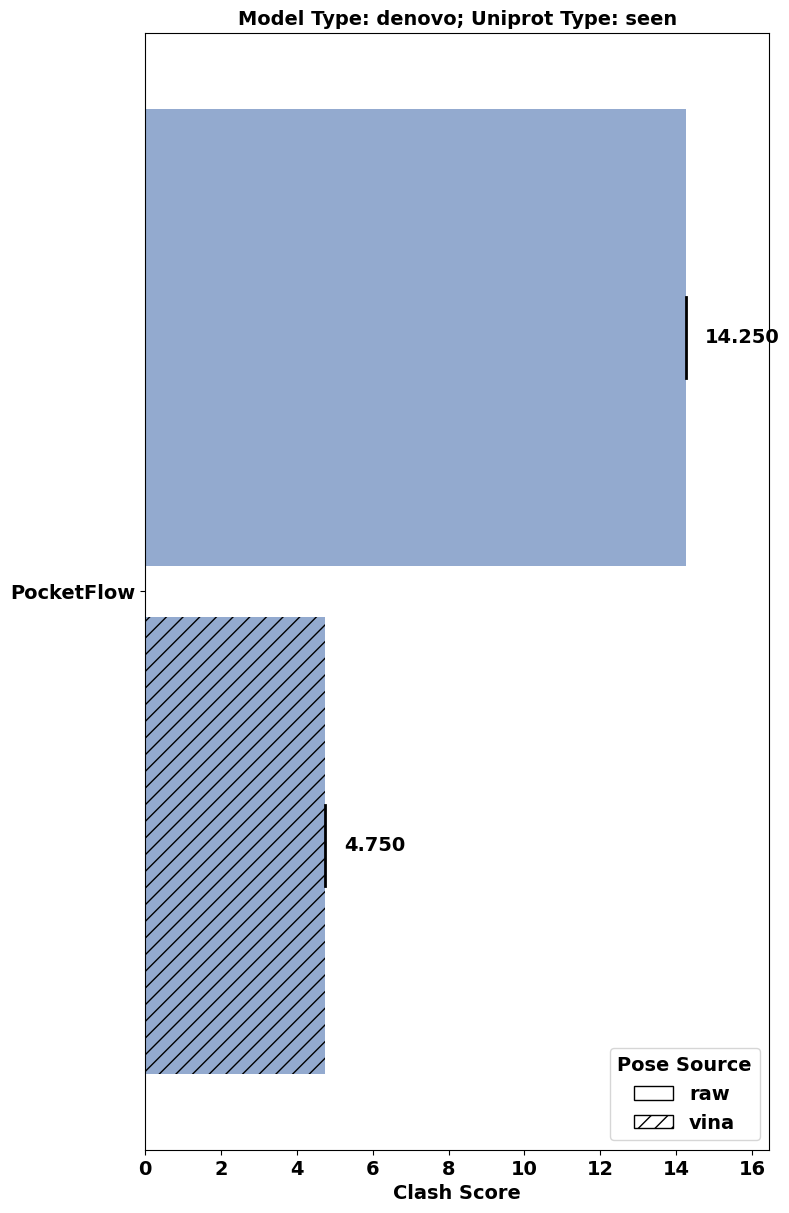

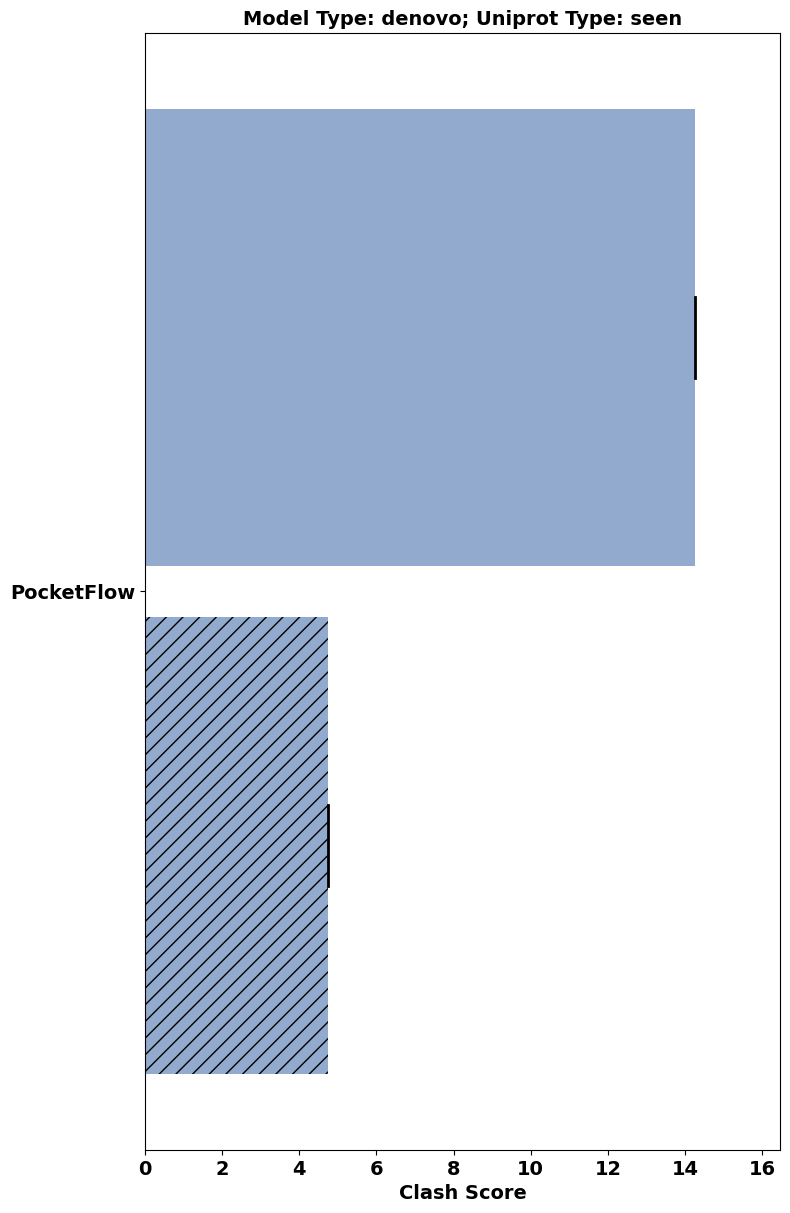

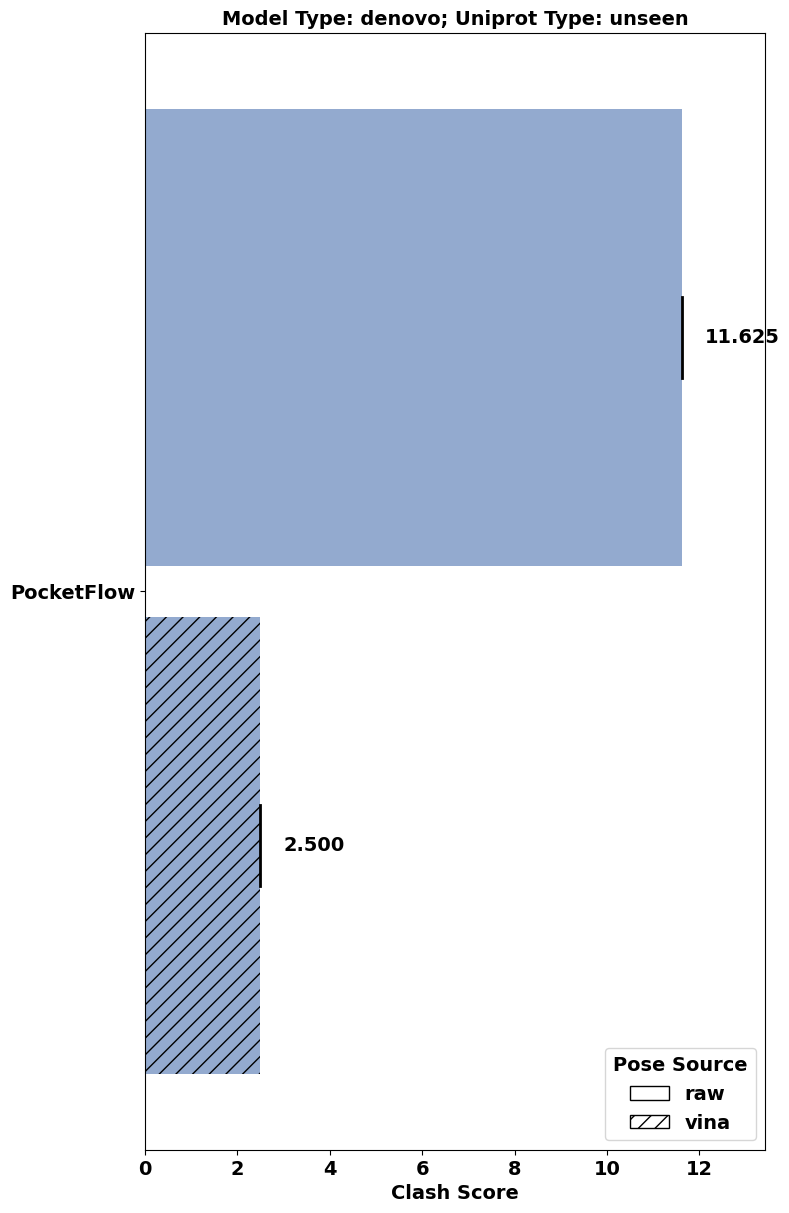

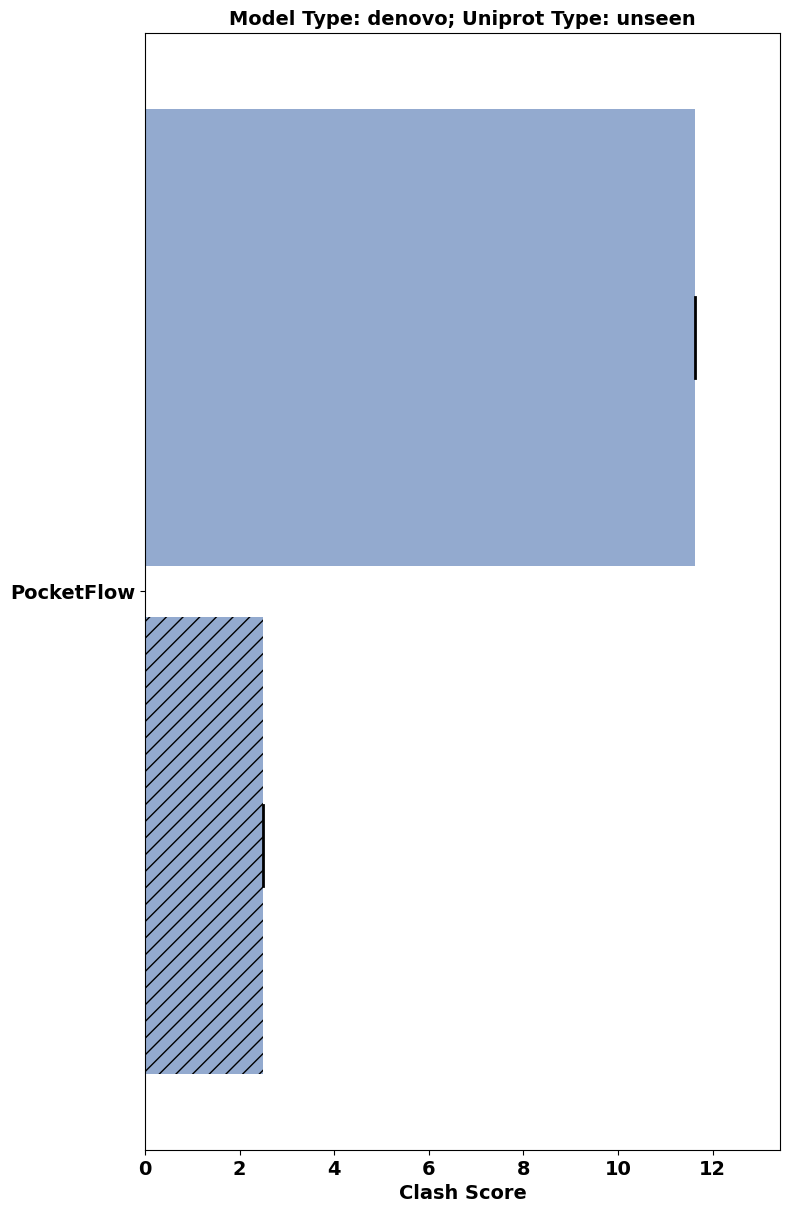

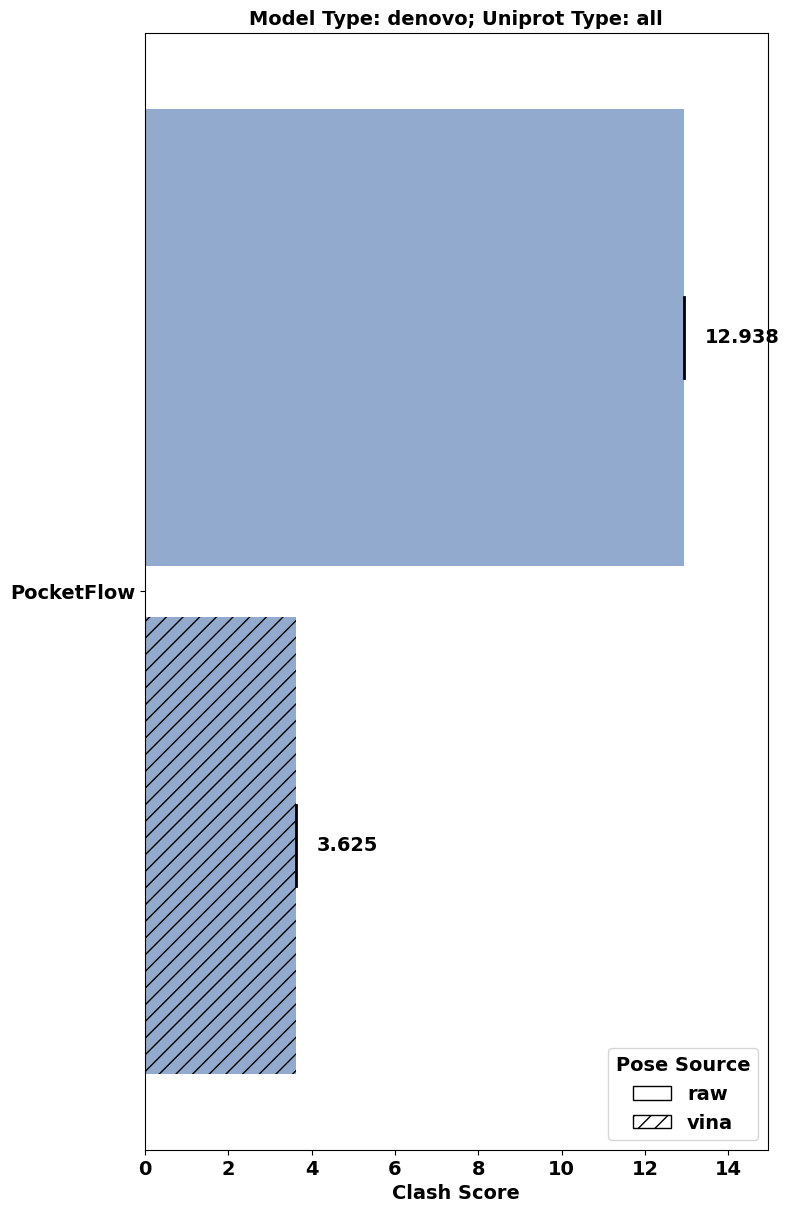

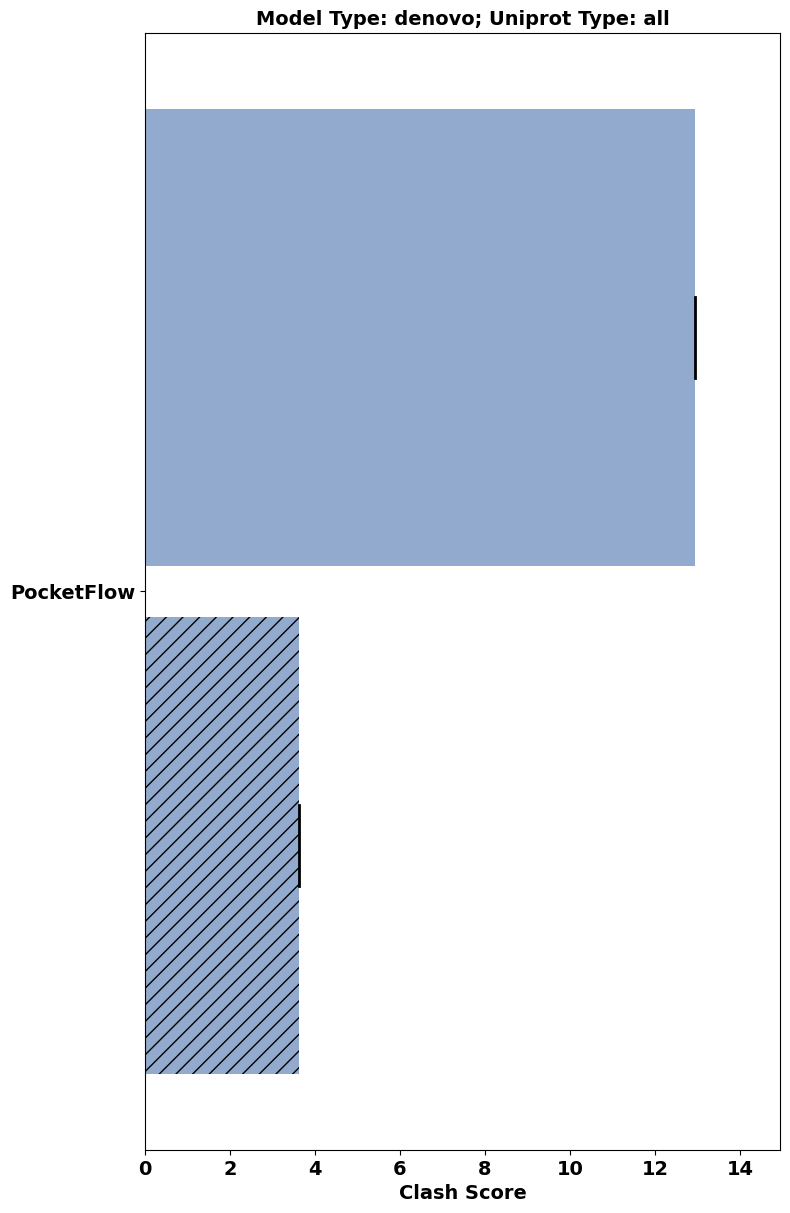

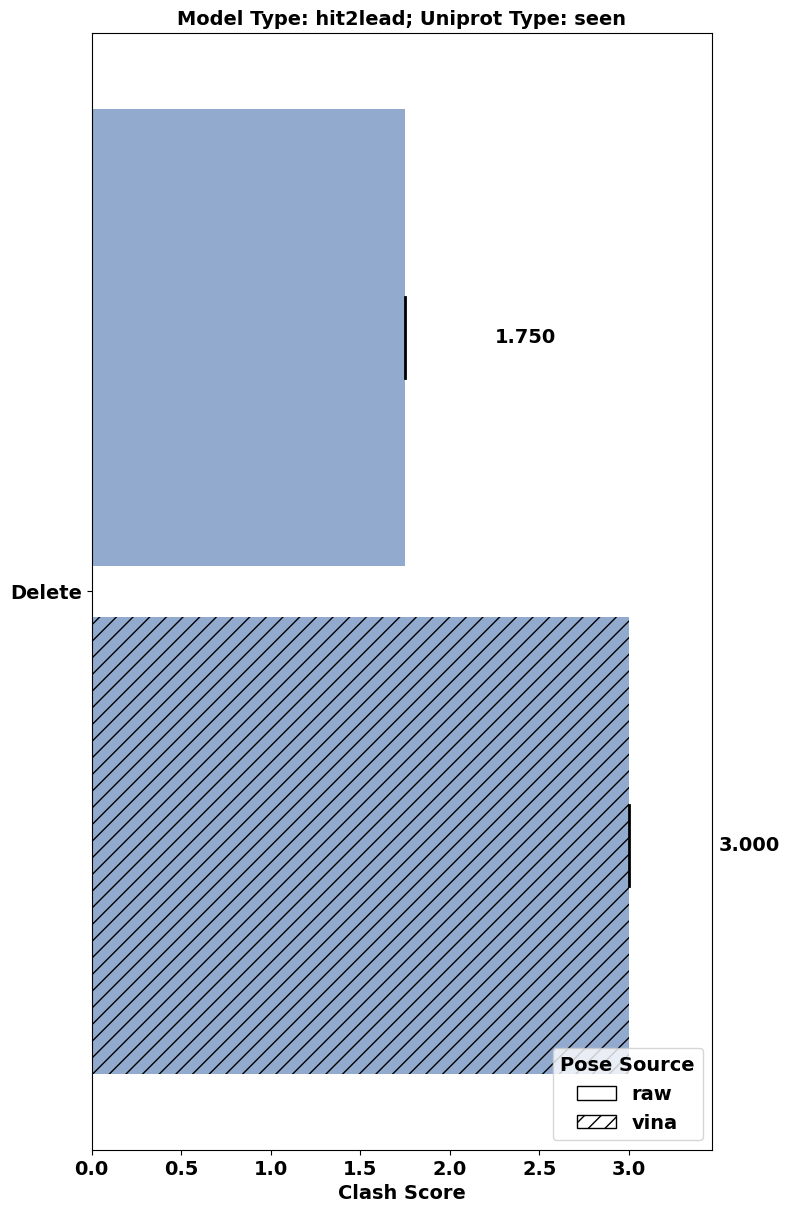

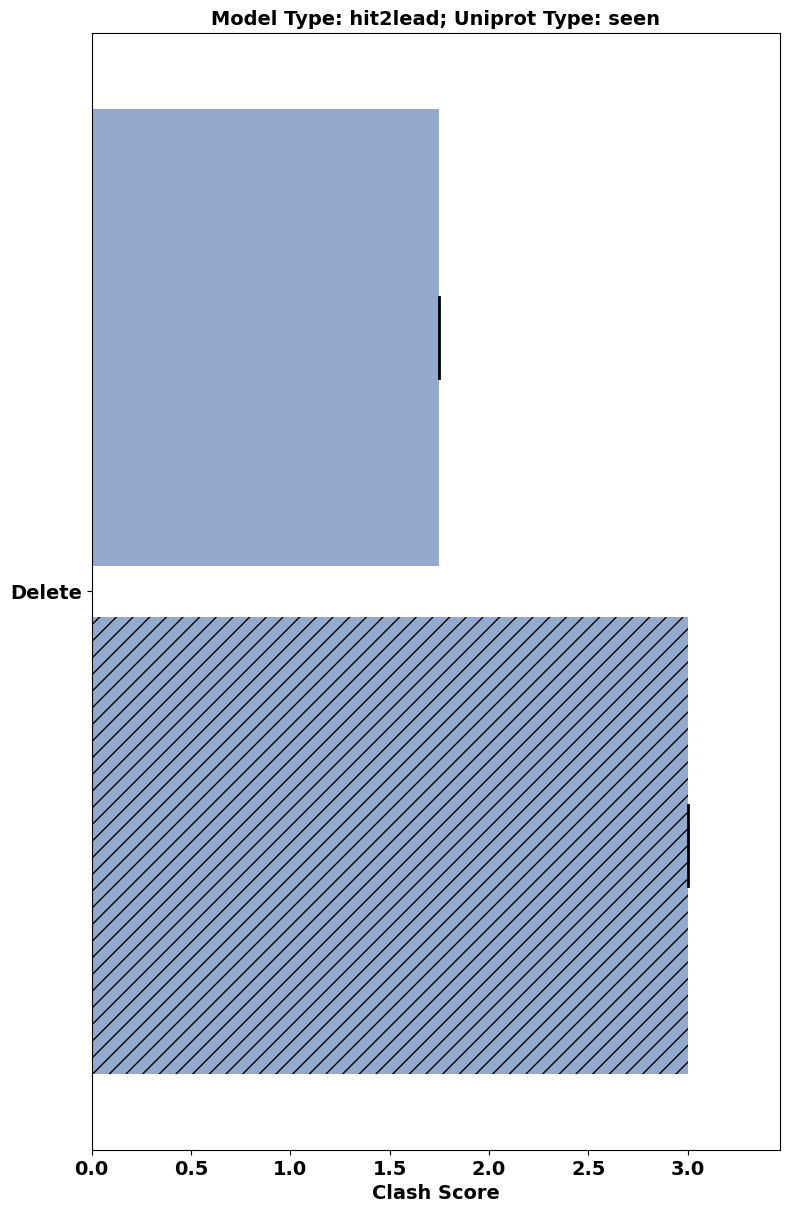

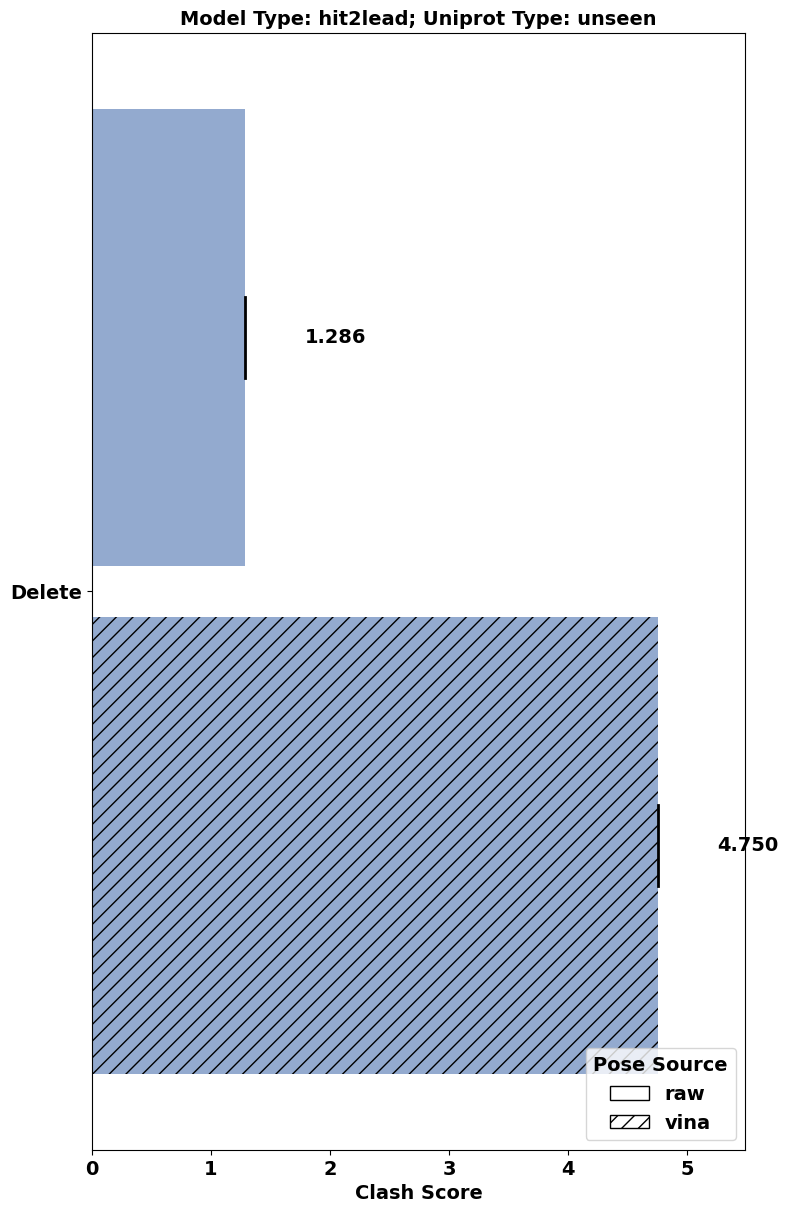

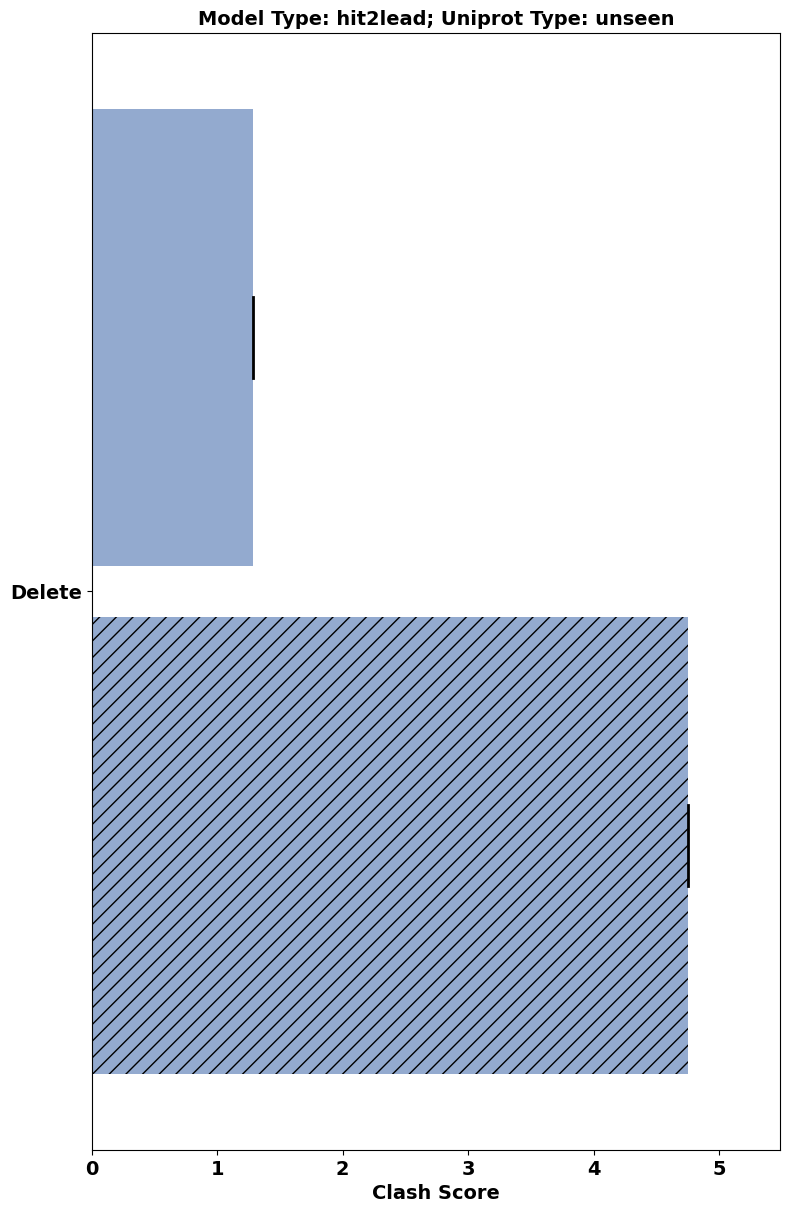

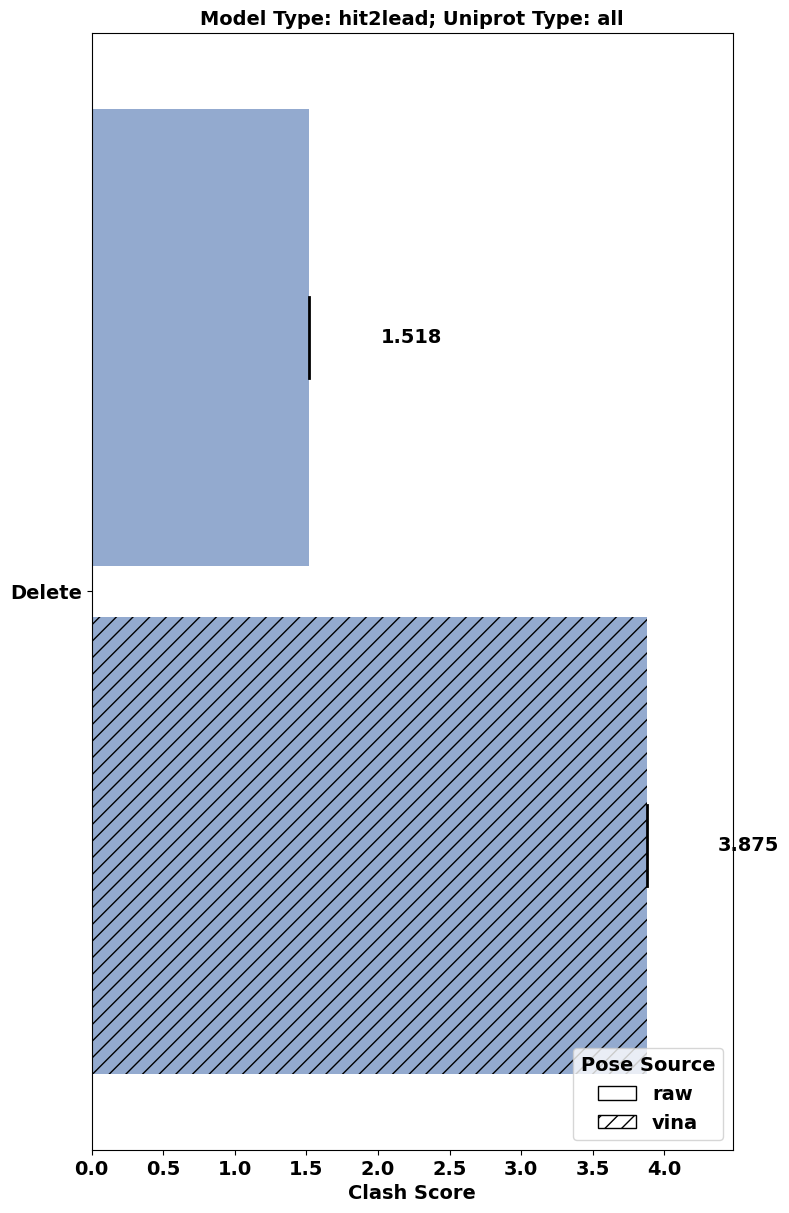

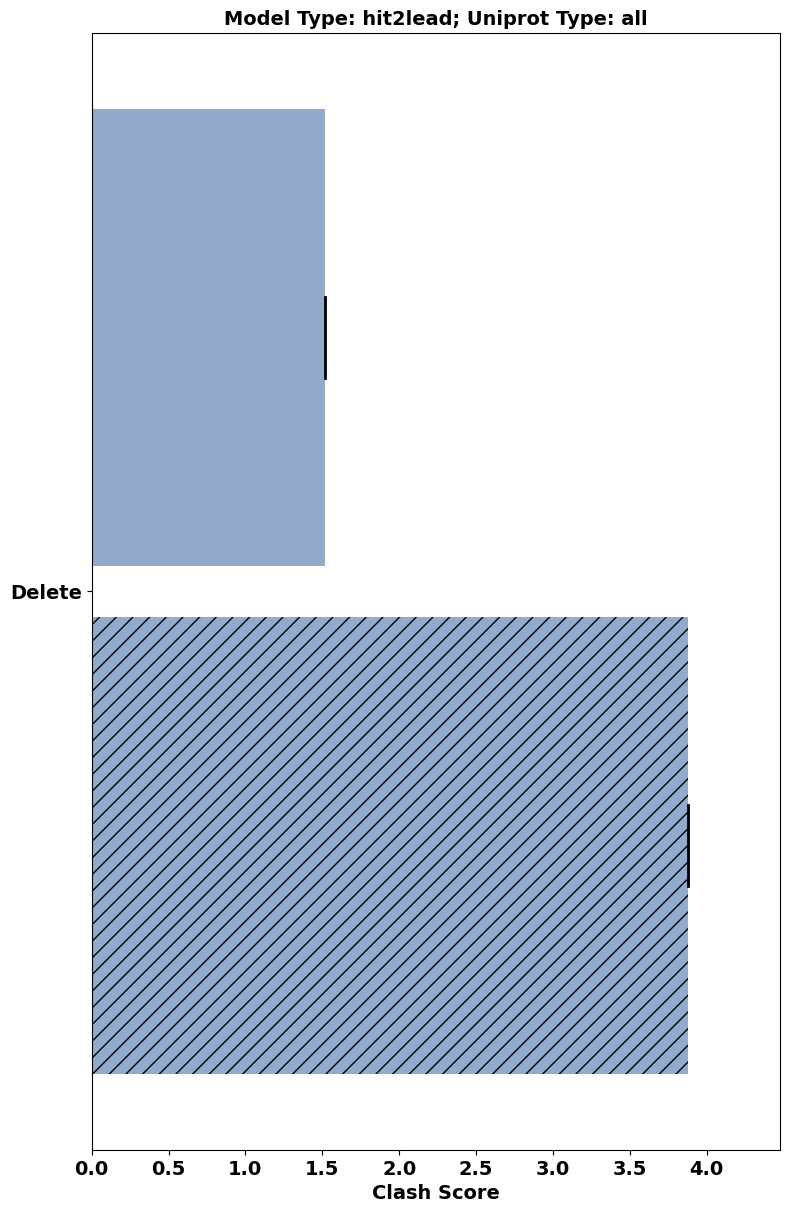

In [121]:

for model_type in ['denovo', 'hit2lead']:
    for uniprot_type in ['seen', 'unseen', 'all']:
        for plot_typle in ['with_mean_value', 'without_mean_value']:
            plot_clash_score_boxh(combined_df, model_type=model_type, uniprot_type=uniprot_type, plot_typle=plot_typle)
# plot_clash_score_boxh(combined_df, model_type='hit2lead', uniprot_type='all',plot_typle='with_mean_value')